In [1]:
import numpy as np 
from tensorflow.keras import layers
from tensorflow.keras import models
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from tensorflow.keras.datasets import mnist
(train_set, train_label), (test_set, test_label) = mnist.load_data()

In [3]:
train_set.shape

(60000, 28, 28)

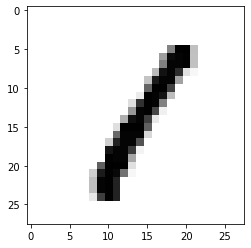

In [4]:
plt.imshow(train_set[3][:,:], cmap = plt.cm.binary)

In [5]:
train_set = train_set.reshape(60000,-1)/255

In [6]:
train_set.shape

(60000, 784)

In [7]:
test_set.shape

(10000, 28, 28)

In [8]:
test_set = test_set.reshape(len(test_set),-1)/255

In [9]:
indices = np.random.permutation(len(train_set))
x_val = train_set[indices[:10000]]
y_val = train_label[indices[:10000]]
x_train = train_set[indices[10000:]]
y_train = train_label[indices[10000:]]
y_train.shape

(50000,)

In [10]:
y_train

array([7, 1, 7, ..., 0, 2, 1], dtype=uint8)

In [11]:
model = models.Sequential()
model.add(layers.Dense(128, activation = 'relu', input_shape=(784,)))
model.add(layers.Dense(10, activation = 'softmax'))

2021-12-12 07:29:20.300183: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2021-12-12 07:29:20.300359: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2021-12-12 07:29:20.300714: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [13]:
from tensorflow.keras.losses import sparse_categorical_crossentropy
from tensorflow.keras.optimizers import Adam
model.compile(optimizer=Adam(learning_rate=1e-3), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [14]:
model.fit(x_train, y_train, epochs=5, batch_size = 256, validation_data=(x_val, y_val))

2021-12-12 07:29:44.174720: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2021-12-12 07:29:44.191809: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 2599990000 Hz


Epoch 1/5
196/196 [==============================] - 2s 8ms/step - loss: 0.8274 - accuracy: 0.7730 - val_loss: 0.2555 - val_accuracy: 0.9275
Epoch 2/5
196/196 [==============================] - 2s 8ms/step - loss: 0.2299 - accuracy: 0.9368 - val_loss: 0.1938 - val_accuracy: 0.9423
Epoch 3/5
196/196 [==============================] - 1s 7ms/step - loss: 0.1726 - accuracy: 0.9516 - val_loss: 0.1567 - val_accuracy: 0.9524
Epoch 4/5
196/196 [==============================] - 1s 6ms/step - loss: 0.1402 - accuracy: 0.9622 - val_loss: 0.1401 - val_accuracy: 0.9571
Epoch 5/5
196/196 [==============================] - 1s 8ms/step - loss: 0.1122 - accuracy: 0.9707 - val_loss: 0.1222 - val_accuracy: 0.9627


In [15]:
y_pred = model.evaluate(test_set, test_label)

313/313 [==============================] - 1s 3ms/step - loss: 0.1144 - accuracy: 0.9661
